Mounting Google Drive

In [159]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importing Libraries

In [160]:
#Importies libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from tensorflow import keras
from tensorflow.keras import layers
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, roc_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib
from sklearn import metrics
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
import re  # Import the 're' module for regular expressions
sns.set()

In [161]:
import warnings
warnings.filterwarnings('ignore')

In [162]:
#Reading the data
data=pd.read_csv('/content/drive/MyDrive/Cyber/dataset.csv')


Exploratory Data analysis

In [163]:
#Vieiwng data head
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [164]:
#Checking the Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [165]:
#Checking for the Unique value in each columns in the data
for col in data.columns:
    unique_value_list=data[col].unique()
    if len(unique_value_list)>10:
        print(f'{col} has {data[col].nunique()} unique values')
    else:
            print(f'{col} contains:\t\t\t{unique_value_list}')

index has 11055 unique values
having_IPhaving_IP_Address contains:			[-1  1]
URLURL_Length contains:			[ 1  0 -1]
Shortining_Service contains:			[ 1 -1]
having_At_Symbol contains:			[ 1 -1]
double_slash_redirecting contains:			[-1  1]
Prefix_Suffix contains:			[-1  1]
having_Sub_Domain contains:			[-1  0  1]
SSLfinal_State contains:			[-1  1  0]
Domain_registeration_length contains:			[-1  1]
Favicon contains:			[ 1 -1]
port contains:			[ 1 -1]
HTTPS_token contains:			[-1  1]
Request_URL contains:			[ 1 -1]
URL_of_Anchor contains:			[-1  0  1]
Links_in_tags contains:			[ 1 -1  0]
SFH contains:			[-1  1  0]
Submitting_to_email contains:			[-1  1]
Abnormal_URL contains:			[-1  1]
Redirect contains:			[0 1]
on_mouseover contains:			[ 1 -1]
RightClick contains:			[ 1 -1]
popUpWidnow contains:			[ 1 -1]
Iframe contains:			[ 1 -1]
age_of_domain contains:			[-1  1]
DNSRecord contains:			[-1  1]
web_traffic contains:			[-1  0  1]
Page_Rank contains:			[-1  1]
Google_Index contains:			[ 1 -1]
L

In [166]:
#checking for missin rate
data.shape

(11055, 32)

In [167]:
#Checking the statistics of the data
data.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [168]:
#dropping the index
data=data.drop(columns=['index'])

In [169]:
#Check and drop deplicate columns
print('Before dedup:', data.shape)
data_cln=data.loc[:, ~data.columns.duplicated()]
print('After dedup:', data_cln.shape)
duplicateCols=data.loc[:, data.columns.duplicated()]
if (duplicateCols.shape[1] !=0):
    print('Number of duplicated columns dropped:', duplicatedCols.shape[1])
    print("Dupliate columns except first occurrences:")
    print(list(duplicateCols.columns))

Before dedup: (11055, 31)
After dedup: (11055, 31)


In [170]:
#Check and drop duplicated rows based on all columns
print ('Before dedup:', data_cln.shape)
data_cln.drop_duplicates(inplace=True) #by default keep='first'
print('After dedup:', data_cln.shape)
duplicateRows=data[data.duplicated()]
print('Number of duplicated rows dropped:', data.shape[0] - data_cln.shape[0])
if (data_cln.shape[0] - data.shape[0] !=0):
    print("Duplicate rows except first occurrence:")
    print(duplicateRows)

Before dedup: (11055, 31)
After dedup: (5849, 31)
Number of duplicated rows dropped: 5206
Duplicate rows except first occurrence:
       having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
180                             1             -1                   1   
203                             1             -1                   1   
323                             1             -1                   1   
364                             1             -1                   1   
381                             1             -1                   1   
...                           ...            ...                 ...   
11047                          -1             -1                   1   
11050                           1             -1                   1   
11051                          -1              1                   1   
11052                           1             -1                   1   
11053                          -1             -1                   1   

     

In [171]:
#Checking Missing and Zero rate
def zero_missing_unique(df):
    var_miss_rate=df.isnull().sum(axis=0)/df.shape[0]
    var_miss_rate=var_miss_rate.to_frame('missing_rate')

    var_zero_rate=(df==0).astype(int).sum(axis=0)/df.shape[0]
    var_zero_rate=var_zero_rate.to_frame('zero_rate')
    var_unique=df.nunique().to_frame('count_unique')
    var_type=df.dtypes.to_frame('data_type')
    data_stat=pd.concat([var_miss_rate, var_zero_rate,var_unique, var_type], axis=1)
    return data_stat
stat_zero_missing_unique=zero_missing_unique(data)# just change the data name here to your own data
stat_zero_missing_unique

,missing_rate,zero_rate,count_unique,data_type
having_IPhaving_IP_Address,0.0,0.000000,2,int64
URLURL_Length,0.0,0.012212,3,int64
Shortining_Service,0.0,0.000000,2,int64
having_At_Symbol,0.0,0.000000,2,int64
double_slash_redirecting,0.0,0.000000,2,int64
Prefix_Suffix,0.0,0.000000,2,int64
having_Sub_Domain,0.0,0.327635,3,int64
SSLfinal_State,0.0,0.105563,3,int64
Domain_registeration_length,0.0,0.000000,2,int64
Favicon,0.0,0.000000,2,int64


<Axes: >

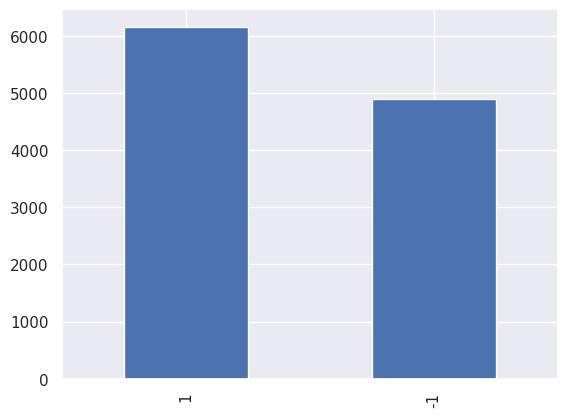

In [172]:
#Plotting frequency of the dependent variable
data['Result'].value_counts().plot(kind='bar')

In [173]:
#Creating dependent and independent indices
X_data=data.drop(columns=['Result'])
Y_data=data['Result']

In [174]:
# Replace all occurrences of -1 with 0 in the "Result" column
Y_data=data['Result'].replace(-1,0)

In [175]:
data['Result'].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

Checking and dropping one variable if correlation between two independent variables are >0.95

In [176]:
#Getting the correlation between the independent Variables
correlation_matrix=X_data.corr()

In [177]:
#Selecting the a threshold for elimination of correlated features
threshold = 0.95
correlated_pairs = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            correlated_pairs.add((colname_i, colname_j))

In [178]:
#Dropping one of correlated features
for var1, var2 in correlated_pairs:
    # Decide which variable to keep and remove the other
    # For example, removing var2:
    if var2 in X_data.columns:
        X_data.drop(var2, axis=1, inplace=True)



Checking if correlation between independent variables are less than <0.95

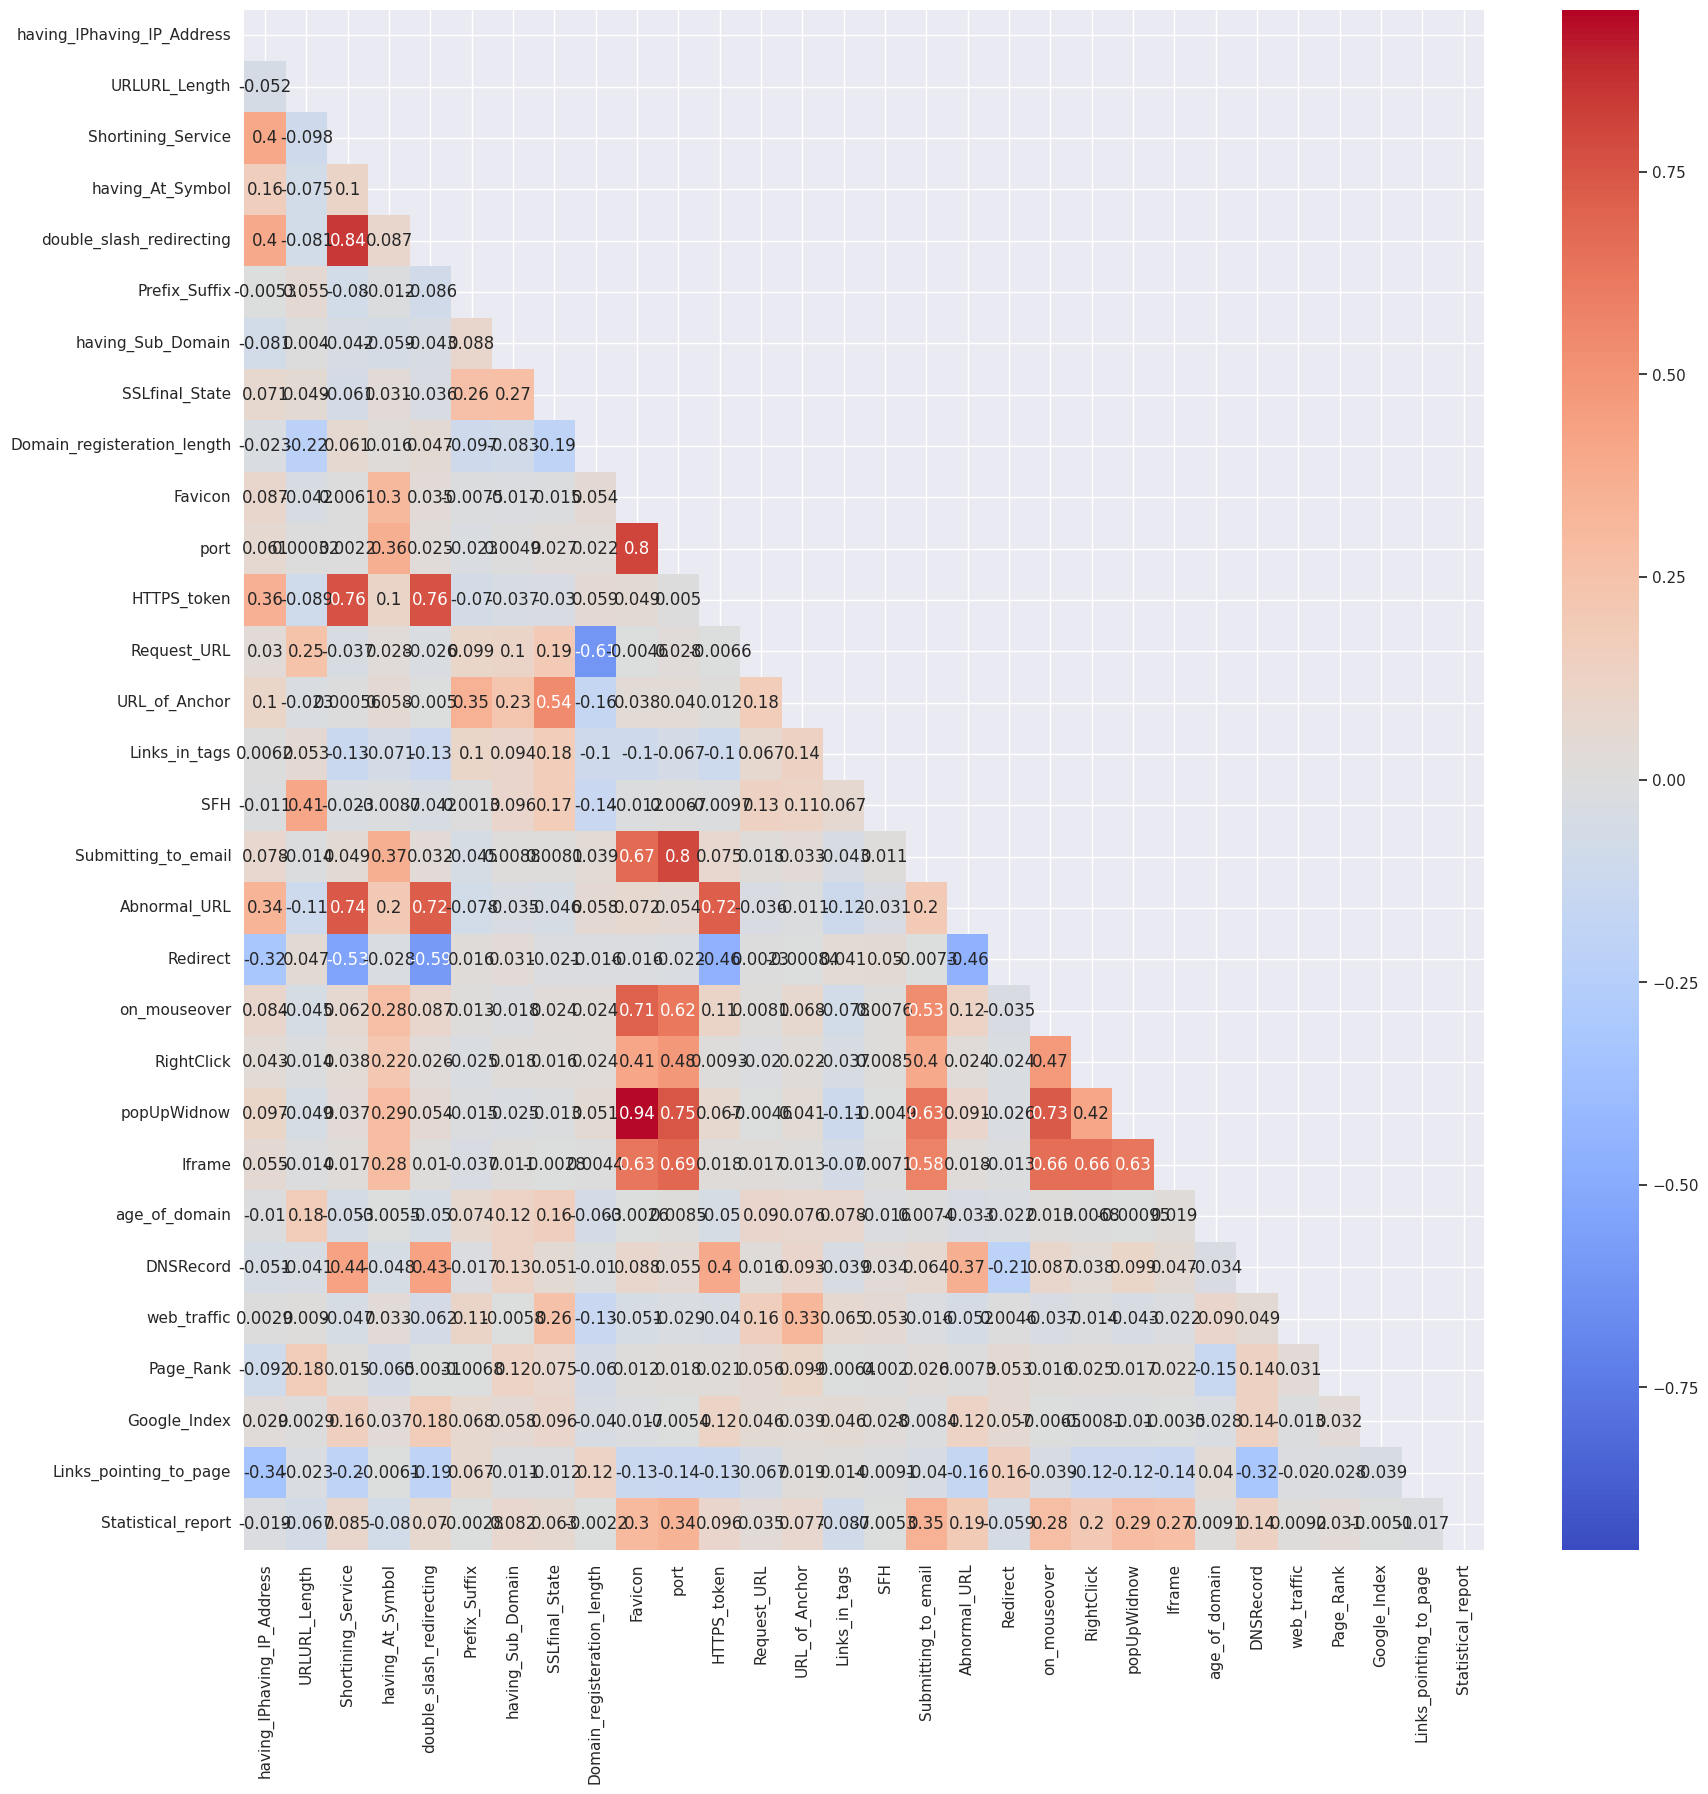

In [179]:
# Finding the Correlation Matrix
correlation_matrix =X_data.corr()

# Create a mask to hide the upper triangle (to avoid duplication)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Define a custom colormap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Set the threshold for the color scale
threshold = 0.95

# Create a heatmap with the custom colormap and threshold
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, mask=mask, vmin=-threshold, vmax=threshold)

plt.show()

Treating class imbalance for the dependent variable using SMOTE Technique

In [180]:
#Applying the Smote to correct for Class imbalance
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# Apply SMOTE to the target variable only
smote = SMOTE(sampling_strategy='auto',random_state=42)
X_resampled,y_resampled = smote.fit_resample(X_data,Y_data)

In [181]:
# Resampled class distribution
from collections import Counter
print("Class distribution after SMOTE (Target variable only):", Counter(y_resampled))

Class distribution after SMOTE (Target variable only): Counter({0: 6157, 1: 6157})


In [182]:
# Sample DataFrame with the resampled target variable y_resampled
Y_resampled= pd.DataFrame({
    'y_resampled': y_resampled  # Replace with your actual resampled target variable
})


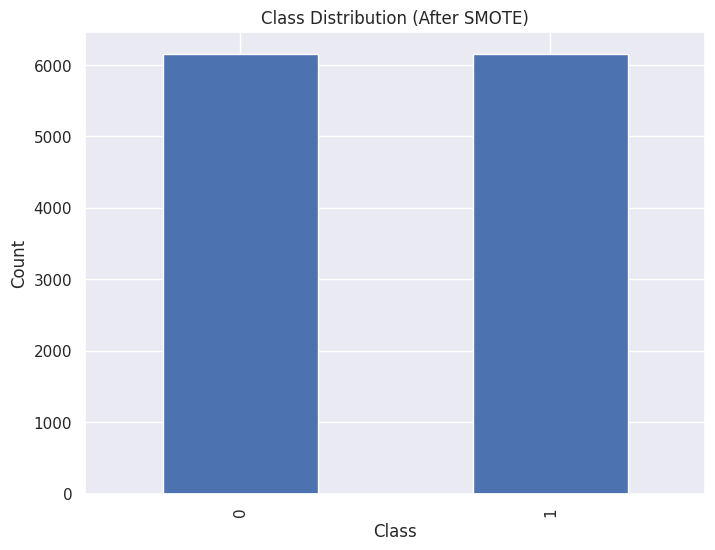

In [183]:
# Count the occurrences of each class
class_counts = Y_resampled['y_resampled'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution (After SMOTE)')
plt.show()


Splitting Data into Training and Testing

In [184]:
#Separate the data into X_trian and y_test
X_train,x_test, y_train,y_test=train_test_split(X_data,Y_data, test_size=0.2, random_state=42)

Defining lists of Machine Learning Model for Spot Shecking

In [185]:

#Spot Check Algorithms
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf')))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB',XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',nthread=1, eval_metric='rmse')))


Performing Cross Validation for each Model

In [186]:
#Performing cross_Validaiton for each of the Machine Learning modle in the list priting;
#Mean Accuracy and Standard deviation of the accuracy for each model
results = []
names = []
seed = 42
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.928542 (0.008785)
LDA: 0.920513 (0.008729)
KNN: 0.941657 (0.007574)
CART: 0.960766 (0.006869)
NB: 0.606058 (0.015056)
SVM: 0.948442 (0.006218)
RF: 0.970264 (0.007440)
XGB: 0.966645 (0.004952)


 Model Performance on Training Data
 Note: Random Forest Model gave the best performance:
 RF: AUC=0.990267 F1=0.991550  PRAUC=0.993363 Recall=0.993472
 Precision= 0.989636  




In [187]:
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, precision_recall_curve, auc
import pandas as pd

model_metrics_train = {}

for name, model in models:
    model.fit(X_train, y_train)  # Train the model on the training data

    # Make predictions on the training data
    train_predictions = model.predict(X_train)

    # AUC
    auc_score = roc_auc_score(y_train, train_predictions)

    # F1-score
    f1 = f1_score(y_train, train_predictions)

    # Recall
    recall = recall_score(y_train, train_predictions)

    # Precision
    precision = precision_score(y_train, train_predictions)

    # Precision-Recall Curve and PRAUC
    precision_values, recall_values, _ = precision_recall_curve(y_train, train_predictions)
    pr_auc = auc(recall_values, precision_values)

    model_metrics_train[name] = {
        'AUC (Train)': auc_score,
        'F1-Score (Train)': f1,
        'Recall (Train)': recall,
        'Precision (Train)': precision,
        'PRAUC (Train)': pr_auc
    }

# Convert the results to a DataFrame
model_metrics_train_df = pd.DataFrame(model_metrics_train)

# Transpose the DataFrame for a better view
model_metrics_train_df = model_metrics_train_df.transpose()

# Print the performance metrics for each model on the training data
print("Model Performance Metrics on Training Data:")
print(model_metrics_train_df)

Model Performance Metrics on Training Data:
      AUC (Train)  F1-Score (Train)  Recall (Train)  Precision (Train)  \
LR       0.927336          0.937008        0.946756           0.927458   
LDA      0.918675          0.929980        0.942880           0.917428   
KNN      0.964568          0.969026        0.973276           0.964813   
CART     0.990441          0.991538        0.992044           0.991033   
NB       0.644894          0.450758        0.291310           0.995816   
SVM      0.952204          0.959040        0.969604           0.948703   
RF       0.990317          0.991547        0.993064           0.990035   
XGB      0.975475          0.978667        0.982660           0.974707   

      PRAUC (Train)  
LR         0.951863  
LDA        0.945984  
KNN        0.976451  
CART       0.993744  
NB         0.839967  
SVM        0.967577  
RF         0.993472  
XGB        0.983489  


In [188]:
model_metrics_train_df.to_excel('/content/drive/MyDrive/Cyber/Train_Results.xlsx', index=False)

\# Performance of each model on the test set

In [189]:
model_metrics_test = {}

for name, model in models:
    # Make predictions on the test data
    test_predictions = model.predict(x_test)

    # AUC
    auc_score = roc_auc_score(y_test, test_predictions)

    # F1-score
    f1 = f1_score(y_test, test_predictions)

    # Recall
    recall = recall_score(y_test, test_predictions)

    # Precision
    precision = precision_score(y_test, test_predictions)

    # Precision-Recall Curve and PRAUC
    precision_values, recall_values, _ = precision_recall_curve(y_test, test_predictions)
    pr_auc = auc(recall_values, precision_values)

    model_metrics_test[name] = {
        'AUC (Test)': auc_score,
        'F1-Score (Test)': f1,
        'Recall (Test)': recall,
        'Precision (Test)': precision,
        'PRAUC (Test)': pr_auc
    }

# Convert the results to a DataFrame
model_metrics_test_df = pd.DataFrame(model_metrics_test)

# Transpose the DataFrame for a better view
model_metrics_test_df = model_metrics_test_df.transpose()

# Print the performance metrics for each model on the test data
print("Model Performance Metrics on Test Data:")
print(model_metrics_test_df)

Model Performance Metrics on Test Data:
      AUC (Test)  F1-Score (Test)  Recall (Test)  Precision (Test)  \
LR      0.921604         0.933492       0.939442          0.927616   
LDA     0.916572         0.931507       0.948207          0.915385   
KNN     0.938837         0.948078       0.952988          0.943218   
CART    0.957366         0.963405       0.964940          0.961875   
NB      0.632545         0.420126       0.266135          0.997015   
SVM     0.944166         0.953955       0.965737          0.942457   
RF      0.963466         0.969529       0.976096          0.963050   
XGB     0.961374         0.967997       0.976096          0.960031   

      PRAUC (Test)  
LR        0.950716  
LDA       0.946495  
KNN       0.961445  
CART      0.973358  
NB        0.839852  
SVM       0.963821  
RF        0.976357  
XGB       0.974848  


Overfitting testing by examining the differences between train and test dataset, with focus on the Random Forest Model.

AUC(2.66%) F1-Score (2.16%) Recall (1.54%)  Precision (2.77%) PRAUC(1.71)%

In [190]:
model_metrics_test_df.to_excel('/content/drive/MyDrive/Cyber/test_Results.xlsx', index=False)


Building Random Forest Model to generate feature important scores

In [191]:
# Create a Random Forest classifier
final_rf_model= RandomForestClassifier(n_estimators=100, random_state=42)

In [192]:
# Train (fit) the model on the training data
final_rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [193]:
# Make predictions on the test data
y_pred = final_rf_model.predict(x_test)

Generating the Feature Importance Score base Random Forest model
Note: The most important feature is SSLfinal_State feature.

In [194]:
#  Random Forest model stored in 'final_rf_model'
feature_importances= final_rf_model.feature_importances_
feature_names = X_train.columns.tolist()

In [195]:
# Step 4: Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

In [196]:
# Step 5: Sort the DataFrame by importance scores
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


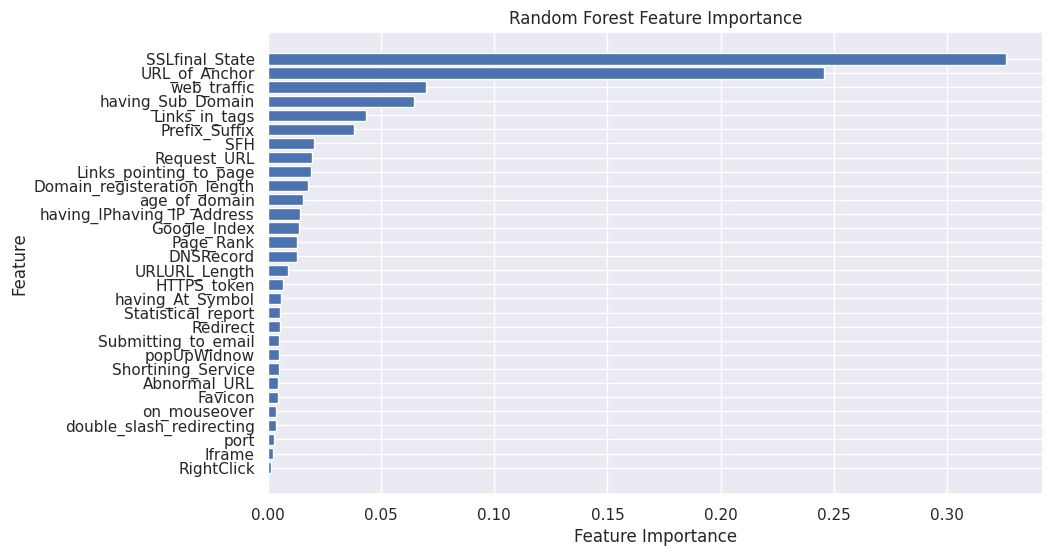

In [197]:
#Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important feature at the top
plt.show()